In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/supermart_grocery_sales.csv')
print(data.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [ ]:
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
print(data.describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


In [ ]:
data.shape

(9994, 11)

In [ ]:
print("Missing values in each column:")
print(data.isnull().sum())
data.dropna(inplace=True)
print("Number of duplicate rows before dropping:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping:", data.duplicated().sum())
print("Shape of the dataset after preprocessing:", data.shape)

Missing values in each column:
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64
Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0
Shape of the dataset after preprocessing: (9994, 11)


In [ ]:
print(data.columns.tolist())

['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


In [ ]:
print("Column Names:", data.columns.tolist())
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
if data['Order Date'].isnull().sum() > 0:
    print("Warning: There are invalid dates in the 'Order Date' column.")
data['Month'] = data['Order Date'].dt.month
print(data.head())


Column Names: ['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']
  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Month  
0   1254      0.12  401.28      0   11.0  
1    749      0.18  149.80      0   11.0  
2   2360      0.21  165.20      0    6.0  
3    896      0.25   89.60      0   10.0  
4   2355      0.26  918.45      0   10.0  


<ipython-input-11-8dd3c1f8a453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


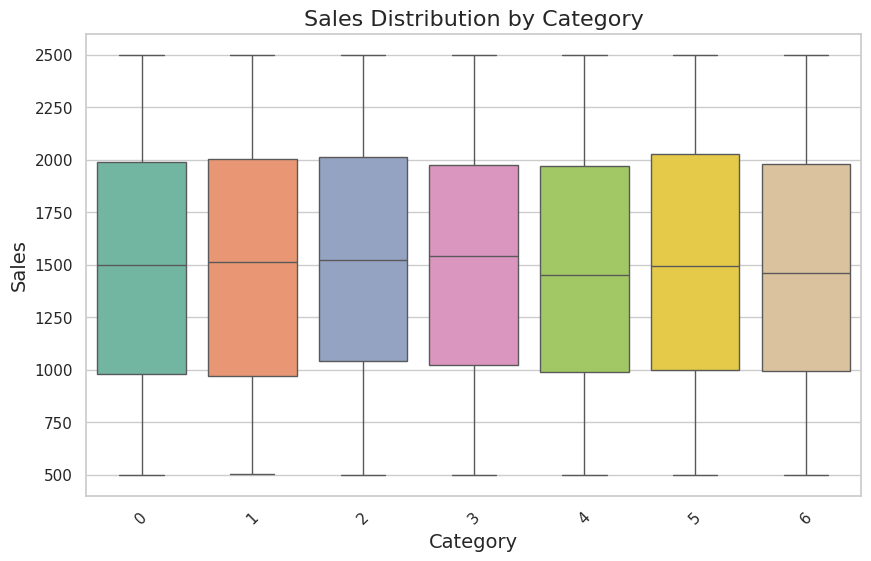

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

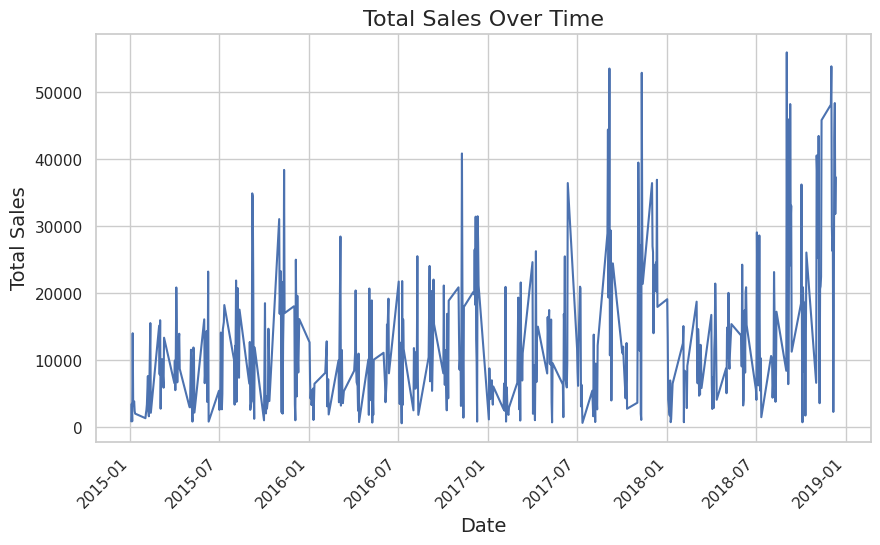

In [ ]:
plt.figure(figsize=(10,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

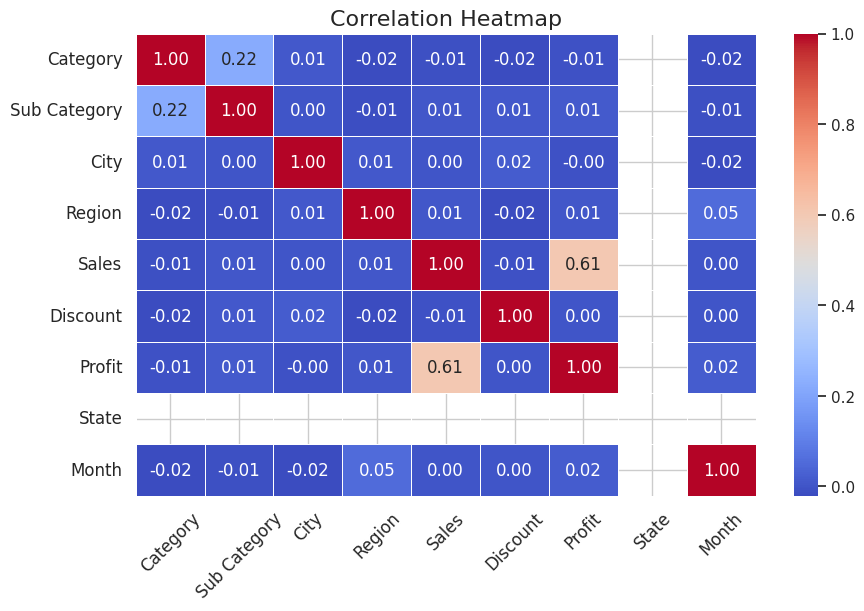

In [ ]:
plt.figure(figsize=(10,6))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y', errors='coerce')
data['Month'] = data['Order Date'].dt.month
columns_to_drop = ['Order ID', 'Customer Name', 'Order Date', 'Sales']
if 'Month' in data.columns:
    columns_to_drop.append('Month')
features = data.drop(columns=columns_to_drop)
target = data['Sales']
categorical_features = ['Category', 'Sub Category', 'City', 'Region', 'State']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(features[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
numerical_features = features.drop(columns=categorical_features)
features_encoded = pd.concat([numerical_features, encoded_df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7995, 62)
X_test shape: (1999, 62)
y_train shape: (7995,)
y_test shape: (1999,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 2.456360978736012e+29
R-squared (R2): -7.447657059754179e+23


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 245636097873601200566237659136.00
R-squared (R2): -744765705975417851084800.00


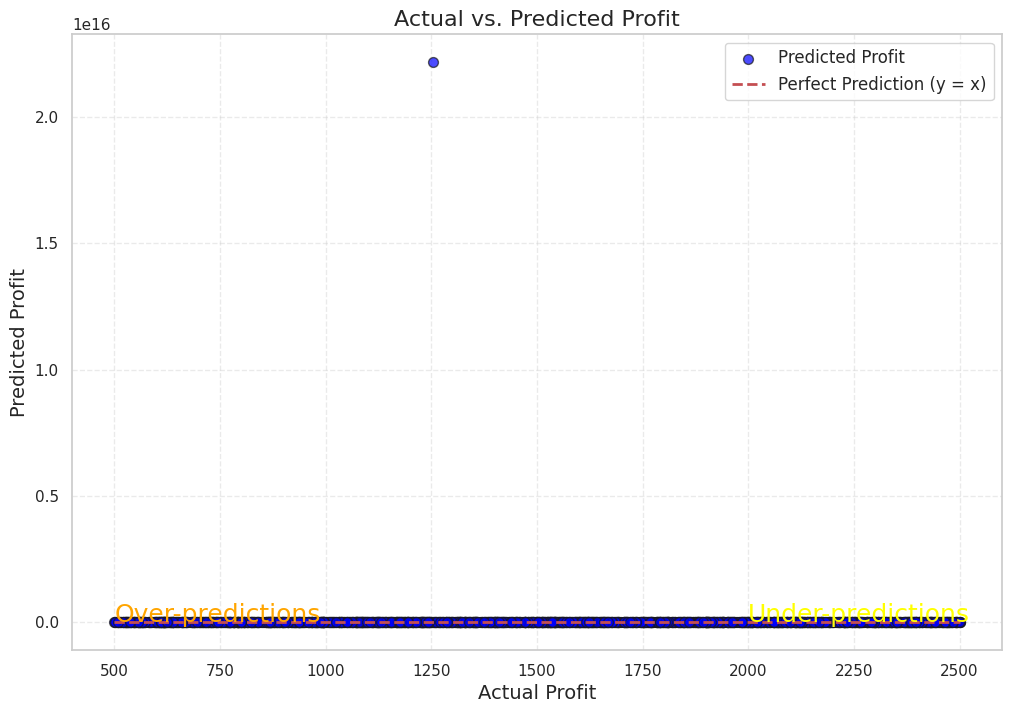

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k', s=50, label='Predicted Profit')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.title('Actual vs. Predicted Profit', fontsize=16)
plt.annotate('Under-predictions', xy=(y_test.max()*0.8, y_test.max()*0.2), color='yellow', fontsize=18)
plt.annotate('Over-predictions', xy=(y_test.max()*0.2, y_test.max()*0.8), color='orange', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)
plt.show()


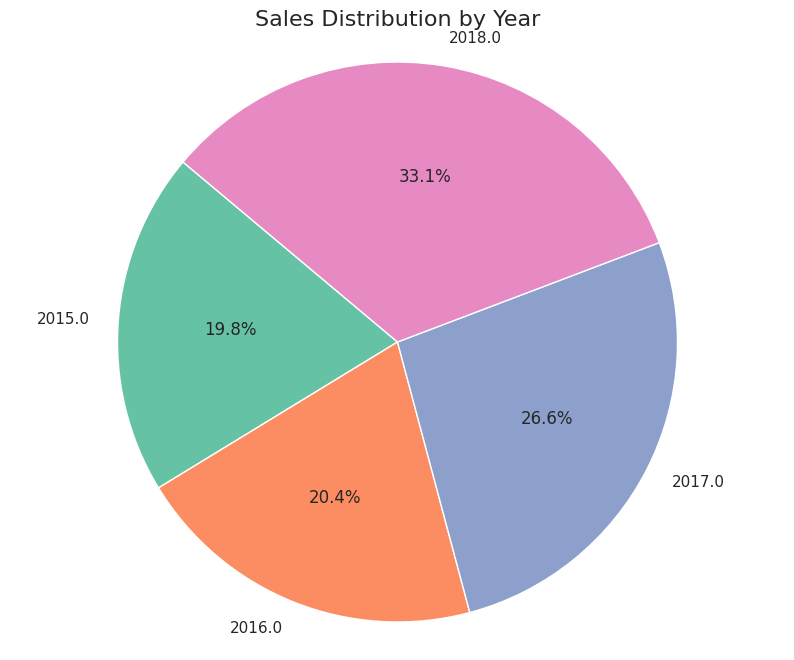

In [ ]:
data['Year'] = data['Order Date'].dt.year
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(yearly_sales['Sales'], labels=yearly_sales['Year'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Sales Distribution by Year', fontsize=16)
plt.axis('equal')
plt.show()
